In [108]:
from sklearn import linear_model
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFE
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


/home/benito/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/benito/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


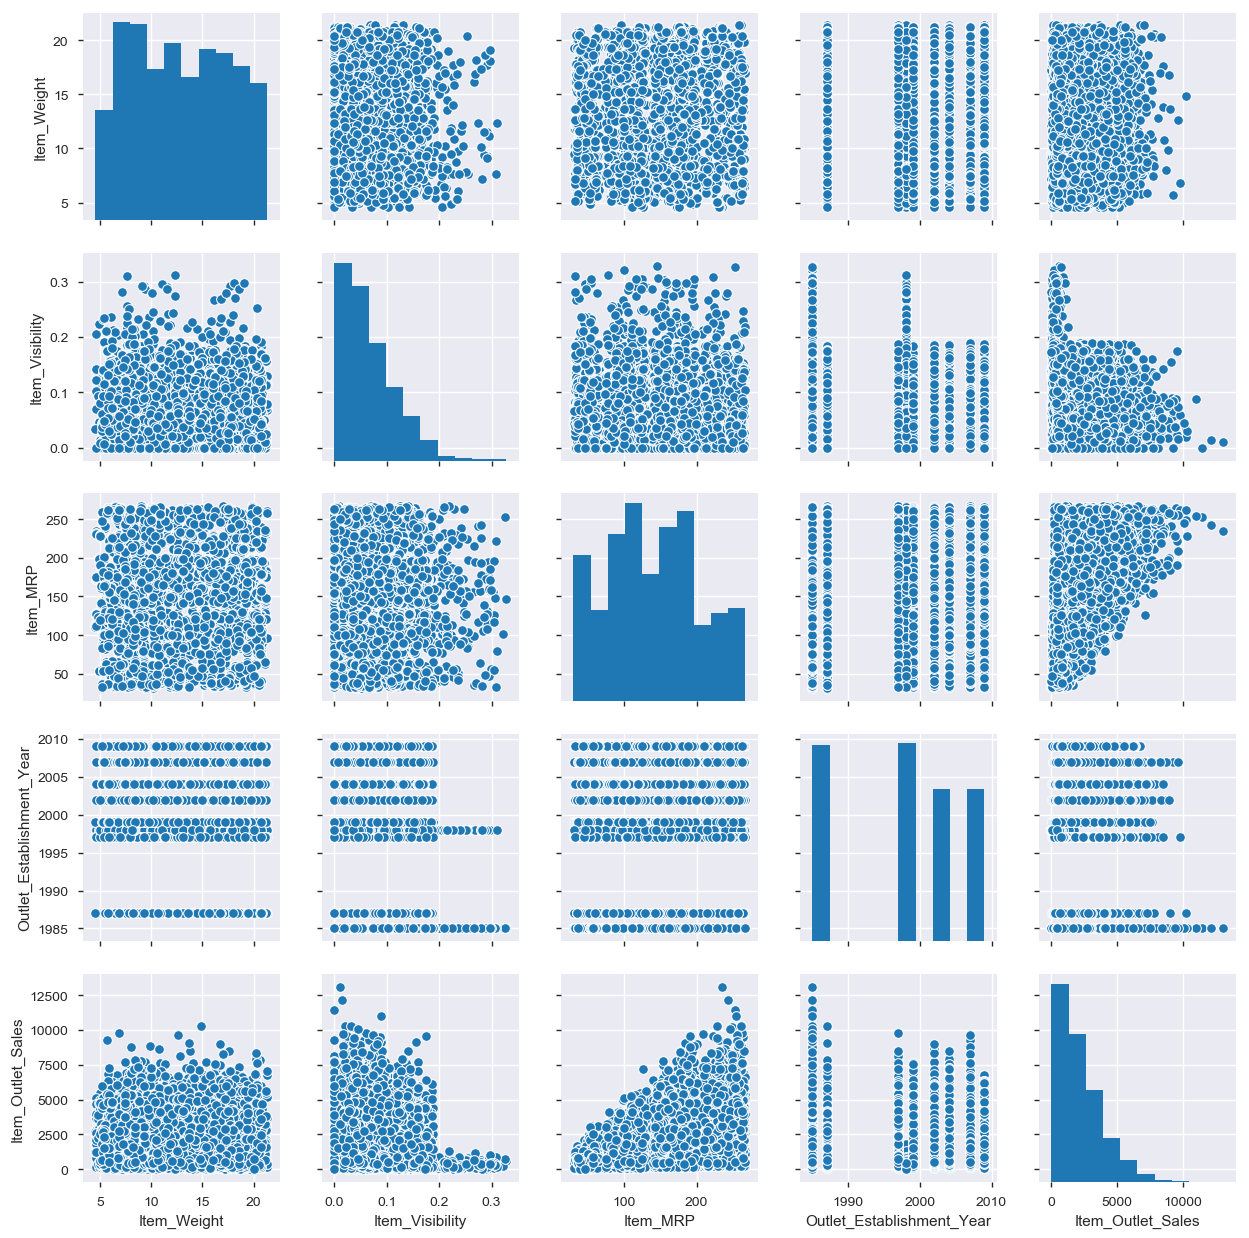

In [8]:
plt=sns.pairplot(data)

1. Процент пропусков - 3, нужно их заменить на моду или медиану
2. Item MRP и Item Visibility очень коррелируют с таргет-переменной. Других корреляций нет
3. Сильных выбросов нет
4. Есть категориальные переменные и вещественные
5. Item_Identifier - код продукта. Переменная с высоким процентом уникальных значений, можно ее поделить на цифры и буквы
6. Item_Visibility у этой переменной 6% заполнено нулями. Интересно посмотреть, какой при этом объем продаж
7. Item_Weight и Outlet_Size имеют 17% и 28% пропусков одновременно

Категориальные переменные:
 - Item_Identifier              8523 non-null object
 - Item_Fat_Content             8523 non-null object
 - Item_Type                    8523 non-null object
 - Outlet_Identifier            8523 non-null object
 - Outlet_Size                  6113 non-null object
 - Outlet_Location_Type         8523 non-null object
 - Outlet_Type                  8523 non-null object

Item_Identifier разобьем на буквы и цифры

In [9]:
data['Item_Identifier_1']=data['Item_Identifier'].apply(lambda row: row[:3])

In [10]:
data['Item_Identifier_1'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [11]:
data['Item_Identifier_2']=data['Item_Identifier'].apply(lambda row: row[3:5])

In [12]:
data['Item_Identifier_2'].unique()

array(['15', '01', '07', '19', '36', '10', '17', '28', '03', '32', '46',
       '49', '42', '11', '02', '22', '12', '30', '37', '06', '59', '51',
       '14', '38', '33', '23', '29', '20', '34', '43', '50', '39', '05',
       '40', '13', '18', '21', '54', '35', '26', '27', '09', '45', '58',
       '48', '04', '25', '55', '44', '41', '56', '57', '47', '60', '52',
       '16', '53', '31', '24', '08'], dtype=object)

In [13]:
del data['Item_Identifier']

Item_Fat_Content примерно 90% процентов этой переменной занимают значения 'Low Fat' и 'Regular'

In [14]:
a=['Low Fat','Regular']

In [15]:
data['Item_Fat_Content_new']=data['Item_Fat_Content'].apply(lambda row: 'Other' if row not in a else row)

In [16]:
data['Item_Fat_Content_new'].unique()

array(['Low Fat', 'Regular', 'Other'], dtype=object)

In [17]:
del data['Item_Fat_Content']

Item_Type - 16 разных значений, пропущенных нет

Outlet_Identifier - 10 разных значений, пропущенных нет. Возможно, последние две цифры совпадают с последними цифрами из идентификатора продукта

In [18]:
data['Outlet_Identifier_1']=data['Outlet_Identifier'].apply(lambda row: row[:3])
data['Outlet_Identifier_2']=data['Outlet_Identifier'].apply(lambda row: row[3:5])

In [19]:
data['Outlet_Identifier_1'].unique()

array(['OUT'], dtype=object)

In [20]:
data['Outlet_Identifier_2'].unique()

array(['04', '01', '02', '03'], dtype=object)

Предположение оказалось неверным.

In [21]:
del data['Outlet_Identifier_1']
del data['Outlet_Identifier']

Outlet_Size - 3 разных значения, 28% пропущенных значений. Заменим их на 'Other', так как мода может запутать модель при таком объеме пропусков

In [22]:
data['Outlet_Size'][data['Outlet_Size'].isnull()]='Other'

/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data['Outlet_Size'].unique()

array(['Medium', 'Other', 'High', 'Small'], dtype=object)

Outlet_Location - 3 разных значений, пропущенных нет

Outlet_Type - 4 разных значения, пропущенных нет. Возможно, это то же самое, что и Outlet_Identifier_2.

In [24]:
data[['Outlet_Type','Outlet_Identifier_2']][data['Outlet_Type']=='Supermarket Type1'].head()

,Outlet_Type,Outlet_Identifier_2
0,Supermarket Type1,04
2,Supermarket Type1,04
4,Supermarket Type1,01
6,Supermarket Type1,01
8,Supermarket Type1,04


Предположение оказалось неверным.

Еще раз посмотрим на данные

In [25]:
pandas_profiling.ProfileReport(data)

Number of variables,13
Number of observations,8523
Total Missing (%),1.3%
Total size in memory,865.7 KiB
Average record size in memory,104.0 B
Numeric,5
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Item_Identifier_1 и Item_Identifier_2 имеют около 70 уникальных значений. В анализе мы не будем их использовать, так как на каждое уникальное значение приходится меньше 1% данных

In [26]:
del data['Item_Identifier_1']
del data['Item_Identifier_2']

Перекодируем категориальные переменные с помощью OHE

In [27]:
cat_feat = list(data.dtypes[data.dtypes == object].index)

In [28]:
cat_feat

['Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Fat_Content_new',
 'Outlet_Identifier_2']

In [29]:
data[cat_feat].head()

,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_new,Outlet_Identifier_2
0,Dairy,Medium,Tier 1,Supermarket Type1,Low Fat,04
1,Soft Drinks,Medium,Tier 3,Supermarket Type2,Regular,01
2,Meat,Medium,Tier 1,Supermarket Type1,Low Fat,04
3,Fruits and Vegetables,Other,Tier 3,Grocery Store,Regular,01
4,Household,High,Tier 3,Supermarket Type1,Low Fat,01


In [30]:
dummy_data = pd.get_dummies(data[cat_feat], columns=cat_feat)
dummy_data.head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_new_Low Fat,Item_Fat_Content_new_Other,Item_Fat_Content_new_Regular,Outlet_Identifier_2_01,Outlet_Identifier_2_02,Outlet_Identifier_2_03,Outlet_Identifier_2_04
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


Перейдем к вещественным признакам

 - Item_Weight                  7060 non-null float64
 - Item_Visibility              8523 non-null float64
 - Item_MRP                     8523 non-null float64
 - Outlet_Establishment_Year    8523 non-null int64

Item_Weight имеет 17% пропущенных значений. Заменим их на медиану

In [31]:
Item_Weight_median = data['Item_Weight'].median()
data['Item_Weight'] = data['Item_Weight'].fillna(Item_Weight_median)

In [32]:
data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Fat_Content_new         0
Outlet_Identifier_2          0
dtype: int64

Outlet_Establishment_Year удобно рассматривать как порядковую переменную. Воспользуемся LE

In [33]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [34]:
le = preprocessing.LabelEncoder()

In [35]:
le.fit(data['Outlet_Establishment_Year'])

LabelEncoder()

In [36]:
data['Outlet_Establishment_Year_new']=le.transform(data['Outlet_Establishment_Year'])

In [37]:
data[['Outlet_Establishment_Year_new','Outlet_Establishment_Year']].head()

,Outlet_Establishment_Year_new,Outlet_Establishment_Year
0,4,1999
1,8,2009
2,4,1999
3,3,1998
4,1,1987


In [38]:
del data['Outlet_Establishment_Year']

Стандартизируем вещественные признаки

In [39]:
num_feat = [f for f in data if f not in (cat_feat + ['Item_Outlet_Sales'] )]

In [40]:
num_feat

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year_new']

In [41]:
scaler = StandardScaler()
scaler.fit(data[num_feat])
data[num_feat]=scaler.transform(data[num_feat])

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
data[num_feat].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year_new
0,-0.831187,-0.970732,1.747454,0.076668
1,-1.630810,-0.908111,-1.489023,1.541783
2,1.108727,-0.956917,0.010040,0.076668
3,1.510904,-1.281758,0.660050,-0.289611
4,-0.918719,-1.281758,-1.399220,-1.022168


In [43]:
data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_new,Outlet_Identifier_2,Outlet_Establishment_Year_new
0,-0.831187,-0.970732,Dairy,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat,04,0.076668
1,-1.630810,-0.908111,Soft Drinks,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,Regular,01,1.541783
2,1.108727,-0.956917,Meat,0.010040,Medium,Tier 1,Supermarket Type1,2097.2700,Low Fat,04,0.076668
3,1.510904,-1.281758,Fruits and Vegetables,0.660050,Other,Tier 3,Grocery Store,732.3800,Regular,01,-0.289611
4,-0.918719,-1.281758,Household,-1.399220,High,Tier 3,Supermarket Type1,994.7052,Low Fat,01,-1.022168


Разделим данные на X и y

In [44]:
X=pd.concat([data[num_feat], dummy_data], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year_new,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_new_Low Fat,Item_Fat_Content_new_Other,Item_Fat_Content_new_Regular,Outlet_Identifier_2_01,Outlet_Identifier_2_02,Outlet_Identifier_2_03,Outlet_Identifier_2_04
0,-0.831187,-0.970732,1.747454,0.076668,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-1.630810,-0.908111,-1.489023,1.541783,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,1.108727,-0.956917,0.010040,0.076668,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1.510904,-1.281758,0.660050,-0.289611,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.918719,-1.281758,-1.399220,-1.022168,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [45]:
y=data.iloc[:,-1]

Разделим на тестовую и обучающую выборки

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Для оценки качества модели выберем среднюю абсолютную ошибку (даст нам представление о величине средней ошибки).

В качестве линейной модели попробуем Ридж-регрессию

In [47]:
ridge_reg = linear_model.Ridge()
alpha_range = list(np.arange(0, 1, 0.1))
alpha_grid = dict(alpha=alpha_range)

In [48]:
ridge_grid = GridSearchCV(ridge_reg, alpha_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [49]:
ridge_grid.fit(X_train, y_train)
for k in ridge_grid.cv_results_:
    print(k, ":", ridge_grid.cv_results_[k][0])

mean_fit_time : 0.06746087074279786
std_fit_time : 0.0299748714272269
mean_score_time : 0.0014752864837646485
std_score_time : 0.0002923349124552793
param_alpha : 0.0
params : {'alpha': 0.0}
split0_test_score : -6.675989184732797e-16
split1_test_score : -1.8072664576994735e-15
split2_test_score : -6.836743618283726e-16
split3_test_score : -7.411186359947366e-16
split4_test_score : -7.681416597612726e-16
split5_test_score : -8.111180349080529e-16
split6_test_score : -9.660730996536644e-16
split7_test_score : -2.585460356723298e-15
split8_test_score : -7.700643842609291e-16
split9_test_score : -1.1898216137254844e-15
mean_test_score : -1.099068686522073e-15
std_test_score : 5.937348014616269e-16
rank_test_score : 1
split0_train_score : -6.702501077689372e-16
split1_train_score : -1.8075750768694917e-15
split2_train_score : -6.691463984387199e-16
split3_train_score : -7.172007265926693e-16
split4_train_score : -7.751092792379238e-16
split5_train_score : -8.074108707423576e-16
split6_train

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/pyth

In [50]:
print(ridge_grid.best_score_)
print(ridge_grid.best_params_)
print(ridge_grid.best_estimator_)

-1.099068686522073e-15
{'alpha': 0.0}
Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [51]:
ridge_grid.best_params_

{'alpha': 0.0}

В случае, если alpha равна 1, то регрессия является простой линейной

In [94]:
linear_reg=linear_model.LinearRegression()

In [95]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
X_linear_reg=linear_reg.predict(X_train)
X_linear_reg_test=linear_reg.predict(X_test)

В качестве нелинейной модели попробуем полиномиальную регрессию. Полиномы возьмем только от вещественных переменных

In [55]:
polynomialfeatures__degree_range=range(1,3,1)
polynomialfeatures__degree_grid = dict(polynomialfeatures__degree=polynomialfeatures__degree_range)
polynomialfeatures=num_feat

In [56]:
pipeline=make_pipeline(PolynomialFeatures(polynomialfeatures), linear_model.LinearRegression())

In [57]:
poly_linear_grid=GridSearchCV(pipeline, polynomialfeatures__degree_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [58]:
poly_linear_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year_new'],
          include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': range(1, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [59]:
for k in poly_linear_grid.cv_results_:
    print(k, ":", poly_linear_grid.cv_results_[k][0])

mean_fit_time : 0.026965069770812988
std_fit_time : 0.003860208327147514
mean_score_time : 0.0035041332244873046
std_score_time : 0.0010077887188107964
param_polynomialfeatures__degree : 1
params : {'polynomialfeatures__degree': 1}
split0_test_score : -1.137408837691491e-15
split1_test_score : -8.204784196464615e-16
split2_test_score : -2.4372813965817953e-15
split3_test_score : -1.1197461986633635e-15
split4_test_score : -5.608498351304722e-16
split5_test_score : -8.208039982460583e-16
split6_test_score : -5.28007093896143e-16
split7_test_score : -1.814001864978633e-15
split8_test_score : -8.187691021180165e-16
split9_test_score : -8.684112329547801e-16
mean_test_score : -1.0926488357233276e-15
std_test_score : 5.662844487069646e-16
rank_test_score : 1
split0_train_score : -1.0973856185630387e-15
split1_train_score : -7.899460276113368e-16
split2_train_score : -2.3983151405732857e-15
split3_train_score : -1.1279999822798863e-15
split4_train_score : -5.887429830919461e-16
split5_train_

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/pyth

In [61]:
print(poly_linear_grid.best_score_)
print(poly_linear_grid.best_params_)
print(poly_linear_grid.best_estimator_)

-1.0926488357233276e-15
{'polynomialfeatures__degree': 1}
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


Лучший результат получается в модели со степенью 1, это обычная линейная модель

Попробуем Passive Aggressive Regressor

In [62]:
C_range=list(np.arange(0.5, 1.5, 0.1))
C_grid = dict(C=C_range)

In [63]:
pass_agress=PassiveAggressiveRegressor()

In [64]:
pass_agress_grid=GridSearchCV(pass_agress, C_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [65]:
pass_agress_grid.fit(X_train, y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.1999999999999997, 1.2999999999999998, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [66]:
for k in pass_agress_grid.cv_results_:
    print(k, ":", pass_agress_grid.cv_results_[k][0])

mean_fit_time : 0.011455035209655762
std_fit_time : 0.0020755334877534167
mean_score_time : 0.0014778375625610352
std_score_time : 0.00024313931489462567
param_C : 0.5
params : {'C': 0.5}
split0_test_score : -0.03235578982616329
split1_test_score : -0.03400561231583743
split2_test_score : -0.03837996776341373
split3_test_score : -0.043296585874419945
split4_test_score : -0.04186631578075902
split5_test_score : -0.03771217782001066
split6_test_score : -0.04087730951171984
split7_test_score : -0.03402375003530255
split8_test_score : -0.0367944438591448
split9_test_score : -0.03693623080569177
mean_test_score : -0.03762504114628849
std_test_score : 0.00341087848942172
rank_test_score : 4
split0_train_score : -0.03346523872770693
split1_train_score : -0.033104755005788515
split2_train_score : -0.039595108131719896
split3_train_score : -0.04058343651222008
split4_train_score : -0.040019745152225186
split5_train_score : -0.03882627545984157
split6_train_score : -0.04109353680288994
split7_tr

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/pyth

In [67]:
print(pass_agress_grid.best_score_)
print(pass_agress_grid.best_params_)
print(pass_agress_grid.best_estimator_)

-0.03639178460346955
{'C': 0.7999999999999999}
PassiveAggressiveRegressor(C=0.7999999999999999, average=False,
              early_stopping=False, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', max_iter=None, n_iter=None,
              n_iter_no_change=5, random_state=None, shuffle=True,
              tol=None, validation_fraction=0.1, verbose=0,
              warm_start=False)


In [97]:
pass_agress=PassiveAggressiveRegressor(C=1)

In [98]:
pass_agress.fit(X_train, y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


PassiveAggressiveRegressor(C=1, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
X_pass_agress=pass_agress.predict(X_train)
X_pass_agress_test=pass_agress.predict(X_test)

Добавим в модель мета-признаки

In [100]:
X_train['pass_agress']=X_pass_agress
X_train['linear_reg']=X_linear_reg

/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Моделью второго уровня будет SGDRegressor

In [74]:
sgd_meta=SGDRegressor()

In [75]:
penalty_range=['l2', 'l1', 'elasticnet']
penalty_grid = dict(penalty=penalty_range)

In [76]:
sgd_meta_grid=GridSearchCV(sgd_meta, penalty_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
sgd_meta_grid.fit(X_train, y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l2', 'l1', 'elasticnet']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [77]:
for k in sgd_meta_grid.cv_results_:
    print(k, ":", sgd_meta_grid.cv_results_[k][0])

mean_fit_time : 0.02031388282775879
std_fit_time : 0.003551586435288229
mean_score_time : 0.0017352819442749024
std_score_time : 0.0002812561042697859
param_penalty : l2
params : {'penalty': 'l2'}
split0_test_score : -0.0077372898540169445
split1_test_score : -0.007447770441617472
split2_test_score : -0.0075553259497327975
split3_test_score : -0.007766491891021176
split4_test_score : -0.007503870422324075
split5_test_score : -0.007794238966485218
split6_test_score : -0.007903600229395687
split7_test_score : -0.007948369116802245
split8_test_score : -0.007866888927600374
split9_test_score : -0.0076432901479670115
mean_test_score : -0.0077167023374528
std_test_score : 0.00016406173817128897
rank_test_score : 1
split0_train_score : -0.008087919772496895
split1_train_score : -0.007645326078815786
split2_train_score : -0.0075542500511271244
split3_train_score : -0.007479226017475245
split4_train_score : -0.0075990443236655806
split5_train_score : -0.007741259913924462
split6_train_score : -

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/pyth

In [78]:
print(sgd_meta_grid.best_score_)
print(sgd_meta_grid.best_params_)
print(sgd_meta_grid.best_estimator_)

-0.0077167023374528
{'penalty': 'l2'}
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)


На обучающих данных MAE=0.0077.  

Проверим качество модели на тестовыхх данных

In [101]:
X_test['pass_agress']=X_pass_agress_test
X_test['linear_reg']=X_linear_reg_test

/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/benito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
sgd_meta=SGDRegressor(penalty='l2')

In [105]:
sgd_meta.fit(X_train,y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [106]:
y_pred=sgd_meta.predict(X_test)

In [107]:
metrics.mean_absolute_error(y_test,y_pred)

0.007985006123437173

Отберем три самых важных признака

In [109]:
sgd_meta=SGDRegressor(penalty='l2')

In [110]:
rfe = RFE(sgd_meta, 3)

In [111]:
fit = rfe.fit(X_train, y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they

In [113]:
print(fit.n_features_)

print(fit.support_)

print(fit.ranking_)

3
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True]
[38 28 30  1 24 12 32 37 36 17 19 34 23 25 35 33 29 16 21 31  2  9  7 18
 15 13 20  4 11  6  8 27 22 26 14  3  5 10  1  1]


Outlet_Establishment_Year_new и два созданных мета-признака оказались самыми информативными.
Посмотрим, какие признаки были наиболее важным в создании мета-признаков

Еще раз получим обучающую и тестовую выборки

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Линейная регрессия

In [140]:
linear_reg=linear_model.LinearRegression()
rfe_linear = RFE(linear_reg, 2)
fit = rfe_linear.fit(X_train, y_train)

In [141]:
print(fit.n_features_)

print(fit.support_)

print(fit.ranking_)

2
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False]
[35 37 36  1 19 16 17 26 32 33 22 28 20 31 18 21 25 24 34 23  4  9  6 15
 12 13 14  2 10  1  5 27 30 29 11  8  7  3]


In [142]:
columns=X.columns
pa_index=fit.support_
pa_features=[]
for i in range(len(pa_index)):
    if pa_index[i]:
        pa_features.append(columns[i])
X_train[pa_features].head()

,Outlet_Establishment_Year_new,Outlet_Type_Supermarket Type2
6316,1.541783,1
6957,0.076668,0
7887,-1.388447,0
4952,1.175504,0
1175,-0.655889,0


Пассивно-агрессивная регрессия

In [143]:
pass_agress=PassiveAggressiveRegressor(C=1)
rfe_pass_agress = RFE(pass_agress, 2)
fit = rfe_pass_agress.fit(X_train, y_train)

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegre

In [144]:
print(fit.n_features_)

print(fit.support_)

print(fit.ranking_)

2
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False]
[32 31 33  1 14 29 36 18 11 19 15 34 27 13 21 37 35 25 28 30 12  3  7 20
  2  1  4  9 26  5  8 22 23 24 16  6 17 10]


In [145]:
columns=X.columns
pa_index=fit.support_
pa_features=[]
for i in range(len(pa_index)):
    if pa_index[i]:
        pa_features.append(columns[i])
X_train[pa_features].head()

,Outlet_Establishment_Year_new,Outlet_Location_Type_Tier 2
6316,1.541783,0
6957,0.076668,0
7887,-1.388447,0
4952,1.175504,1
1175,-0.655889,0


Outlet_Establishment_Year_new, Outlet_Type_Supermarket Type2, Outlet_Type_Supermarket Type2 - эти переменные вносят наибольший вклад в модель.
